# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

### Import libraries


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.datasets import make_blobs, load_wine, load_digits
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier, plot_importance

from utils.plottings import plot_learning_curve
from utils.helpers_Garden import visualize_tree, plot_tree_interactive, randomized_tree_interactive, visualize_classifier

%matplotlib inline
#%config InlineBackend.figure_format = "retina"
plt.rcParams['figure.figsize'] = (20.0, 13.0)
sns.set()

## Exercises

### Exercise 1

Classify the digit dataset with a decision tree such that your classifier is in overfit.

1. Show that actually the classifier overfits data.
2. Play with hyperparameters in order to improve the model performances on test set.
3. Apply ensemble methods (Random Forest or the explicit bagging classifier) to show how these reduce overfit and increase test accuracy.

__NOTE__: you should get a final accuracy above the $95\%$.

In [2]:
digits, target = load_digits(as_frame=True, return_X_y=True)
digits

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(digits, target, test_size=0.2)

No need to rescale data for decision tree
<br>
Let's see the baseline model, we will use accuracy as metric because the dataset is balanced

In [4]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print(f'Train score = {dt.score(X_train, y_train)} | Test score = {dt.score(X_test, y_test)}')

Train score = 1.0 | Test score = 0.8388888888888889


The tree is overfitting really bad, let's try a grid search

In [5]:
params = {'max_depth': [i for i in range(4, 13)],
          'min_samples_split': [i for i in range(2, 7)],
          'max_features':['auto', 'sqrt', 'log2'],
          'criterion': ['gini', 'entropy'],
          'ccp_alpha': [0, 0.01, 0.1, 1]
         }
dt_grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv = 10, n_jobs=-1)
dt_grid.fit(X_train, y_train)

print(f'Best parameters: {dt_grid.best_params_}')
print(f'Train score = {dt_grid.score(X_train, y_train)} | Test score = {dt_grid.score(X_test, y_test)}')

Best parameters: {'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 3}
Train score = 0.9603340292275574 | Test score = 0.8333333333333334


C:\Users\ggiam\anaconda3\envs\py10\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


<module 'matplotlib.pyplot' from 'C:\\Users\\ggiam\\anaconda3\\envs\\py10\\lib\\site-packages\\matplotlib\\pyplot.py'>

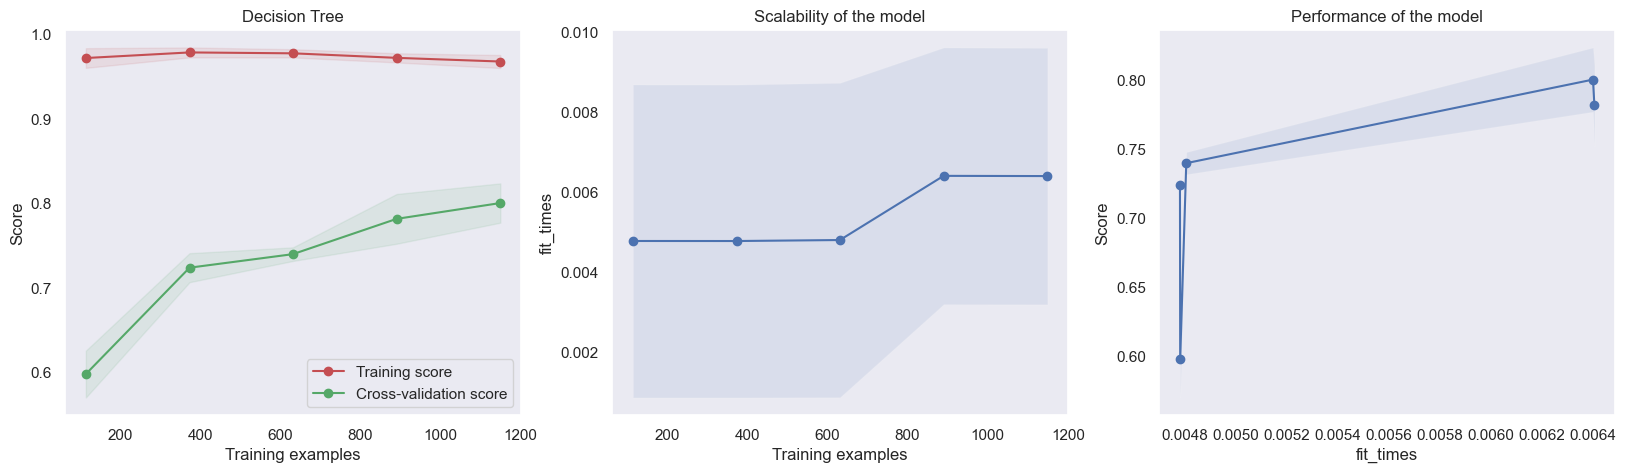

In [6]:
best_dt = dt_grid.best_estimator_
plot_learning_curve(estimator=best_dt, title='Decision Tree', X=X_train, y=y_train, n_jobs=-1)

We reduced a little bit overfitting, but there is still a huge gap between train and test score

Text(0.5, 110.24999999999996, 'Predicted')

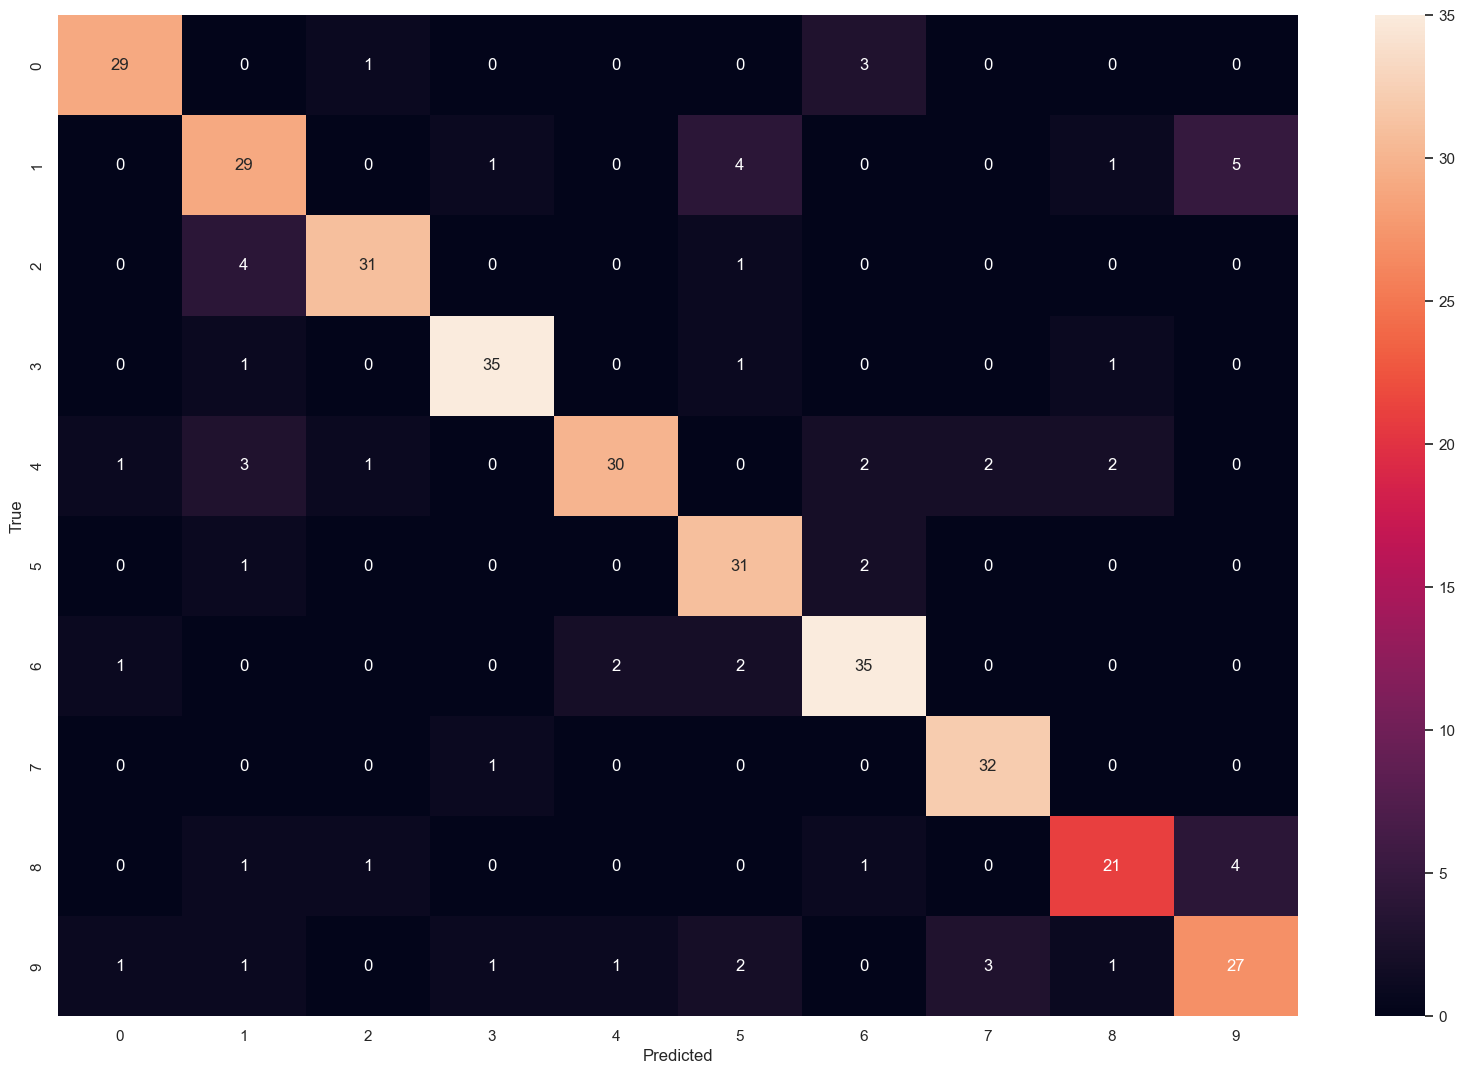

In [7]:
dt_predictions = best_dt.predict(X_test)
dt_cm = confusion_matrix(y_test, dt_predictions)
sns.heatmap(dt_cm, annot=True)
plt.ylabel('True')
plt.xlabel('Predicted')

In [8]:
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.72      0.72      0.73        40
           2       0.91      0.86      0.89        36
           3       0.92      0.92      0.92        38
           4       0.91      0.73      0.81        41
           5       0.76      0.91      0.83        34
           6       0.81      0.88      0.84        40
           7       0.86      0.97      0.91        33
           8       0.81      0.75      0.78        28
           9       0.75      0.73      0.74        37

    accuracy                           0.83       360
   macro avg       0.84      0.84      0.83       360
weighted avg       0.84      0.83      0.83       360



As we can see there are a lot of missclassification with the decision tree, let's try the random forest

In [9]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print(f'Train score = {rf.score(X_train, y_train)} | Test score = {rf.score(X_test, y_test)}')

Train score = 1.0 | Test score = 0.975


The baseline is better than a single random forest, but the model is still overfitting
<br>
Let's gridsearch over the random forest

In [10]:
params = {'n_estimators': [i for i in range(30, 131, 10)],
          'max_depth': [i for i in range(2, 8)],
          'min_samples_split': [i for i in range(2, 7)],
          'max_features':['auto', 'sqrt', 'log2'],
          'criterion': ['gini', 'entropy'],
         }
df_grid = GridSearchCV(RandomForestClassifier(), param_grid=params, n_jobs=-1)
df_grid.fit(X_train, y_train)

print(f'Best parameters: {df_grid.best_params_}')
print(f'Train score = {df_grid.score(X_train, y_train)} | Test score = {df_grid.score(X_test, y_test)}')

Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'min_samples_split': 3, 'n_estimators': 130}
Train score = 0.9958246346555324 | Test score = 0.9805555555555555


<module 'matplotlib.pyplot' from 'C:\\Users\\ggiam\\anaconda3\\envs\\py10\\lib\\site-packages\\matplotlib\\pyplot.py'>

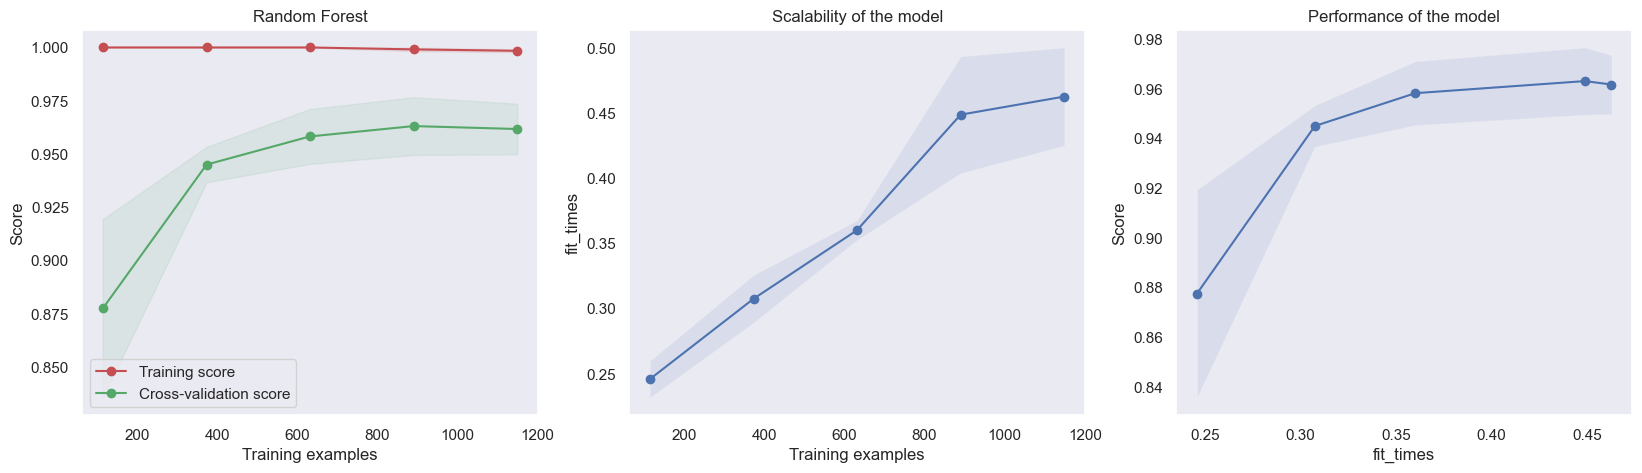

In [11]:
best_rf = df_grid.best_estimator_
plot_learning_curve(estimator=best_rf, title='Random Forest', X=X_train, y=y_train, n_jobs=-1)

Slightly reduced overfitting
<br>
Even if max_depth is at the right limit of gridsearch, increase this parameter won't lead to a better fitting situation.
<br>
We will leave the model as it is.
<br>
Let's see the confusion matrix and the classification report

Text(0.5, 110.24999999999996, 'Predicted')

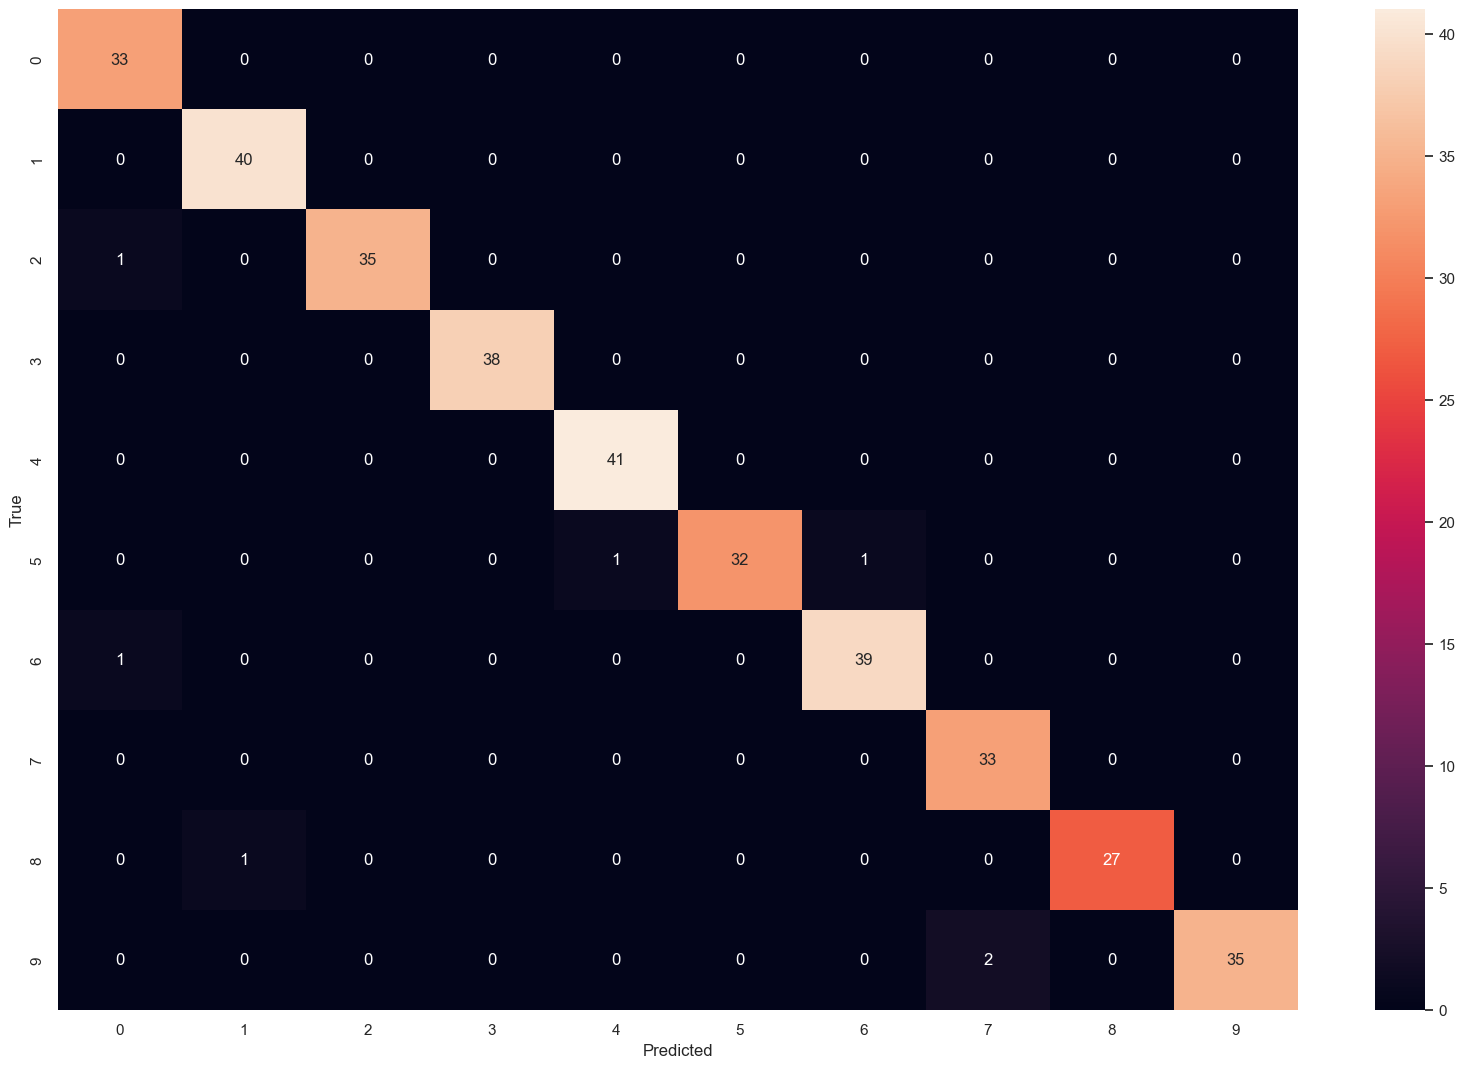

In [12]:
rf_predictions = best_rf.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(rf_cm, annot=True)
plt.ylabel('True')
plt.xlabel('Predicted')

The random forest performs much better as expected

In [13]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       0.98      1.00      0.99        40
           2       1.00      0.97      0.99        36
           3       1.00      1.00      1.00        38
           4       0.98      1.00      0.99        41
           5       1.00      0.94      0.97        34
           6       0.97      0.97      0.97        40
           7       0.94      1.00      0.97        33
           8       1.00      0.96      0.98        28
           9       1.00      0.95      0.97        37

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



As we can see from the report and confusion matrix 9 and 5 are the most missclassified digit

# Bonus

In [14]:
from tensorflow import keras
from functools import partial
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import StandardScaler
import visualkeras
from PIL import ImageFont

In [15]:
def cnn():
    
    DefaultConv2D = partial(keras.layers.Conv2D,
                            kernel_size=3,
                            activation='selu',
                            padding="SAME")
    
    cnn = keras.models.Sequential([
        DefaultConv2D(filters=64, kernel_size=3, input_shape=[8, 8, 1]),
        keras.layers.MaxPooling2D(pool_size=2),
        keras.layers.Flatten(),
        keras.layers.Dense(units=50, activation='selu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(units=10, activation='softmax')
    ])

    cnn.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'Nadam', metrics = ['accuracy'])
    
    return cnn

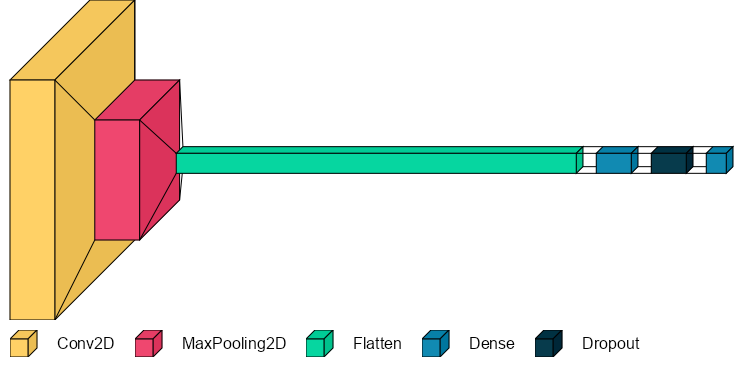

In [16]:
font = ImageFont.truetype("arial.ttf", 16)
visualkeras.layered_view(cnn(), legend=True, font=font, scale_xy=30, scale_z=0.7, spacing=20)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train).reshape(X_train.shape[0],8,8)
X_test_scaled = scaler.transform(X_test).reshape(X_test.shape[0],8,8)

In [18]:
cnn_wrap = KerasClassifier(cnn(), epochs = 20, batch_size = 32, verbose=1)
cnn_wrap.fit(X_train_scaled, y_train)
cnn_wrap.score(X_test_scaled, y_test)

Epoch 1/20
45/45 [==============================] - 1s 4ms/step - loss: 1.2209 - accuracy: 0.6660
Epoch 2/20
45/45 [==============================] - 0s 4ms/step - loss: 0.4674 - accuracy: 0.8859
Epoch 3/20
45/45 [==============================] - 0s 4ms/step - loss: 0.2929 - accuracy: 0.9248
Epoch 4/20
45/45 [==============================] - 0s 4ms/step - loss: 0.2237 - accuracy: 0.9408
Epoch 5/20
45/45 [==============================] - 0s 5ms/step - loss: 0.1682 - accuracy: 0.9548
Epoch 6/20
45/45 [==============================] - 0s 5ms/step - loss: 0.1411 - accuracy: 0.9624
Epoch 7/20
45/45 [==============================] - 0s 4ms/step - loss: 0.1141 - accuracy: 0.9729
Epoch 8/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0924 - accuracy: 0.9770
Epoch 9/20
45/45 [==============================] - 0s 5ms/step - loss: 0.0936 - accuracy: 0.9763
Epoch 10/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0770 - accuracy: 0.9770
Epoch 11/20
45/45 [

0.9916666666666667

INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp899hkh9r\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp899hkh9r\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmph6fxsazw\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmph6fxsazw\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpiozx77xx\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpiozx77xx\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp0tow6e1m\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp0tow6e1m\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp89fd_8d8\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp89fd_8d8\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpxhdn27q3\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpxhdn27q3\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp467of9sv\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp467of9sv\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpqq0387sj\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpqq0387sj\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmprrzjw_72\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmprrzjw_72\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp_47c8sm4\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp_47c8sm4\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp6uiwhduz\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp6uiwhduz\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpe5z2q4z0\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpe5z2q4z0\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpbfl6ul5s\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpbfl6ul5s\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpqq2_5u3q\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpqq2_5u3q\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpza6o0_bw\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpza6o0_bw\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmphwny7h42\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmphwny7h42\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmphqs9m_q4\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmphqs9m_q4\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpm1kxj8tz\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpm1kxj8tz\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp1z2fi8p6\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp1z2fi8p6\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpdw9edp84\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpdw9edp84\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp5sq8c7bk\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp5sq8c7bk\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpik2ucgd9\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpik2ucgd9\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpdf71r0yv\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpdf71r0yv\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpfj0eueuj\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpfj0eueuj\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpbj13ug0q\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpbj13ug0q\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp6ji0gof3\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp6ji0gof3\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp03t5ta1i\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp03t5ta1i\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpxchgapgy\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpxchgapgy\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpmwfvpcol\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpmwfvpcol\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpn017l4hd\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpn017l4hd\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpb7wiqnp5\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpb7wiqnp5\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpsz3_8dvr\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpsz3_8dvr\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpbnvckgd0\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpbnvckgd0\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpk0d6lqn9\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpk0d6lqn9\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp0noq21km\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp0noq21km\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpy9xxpuqg\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpy9xxpuqg\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpuwce1pfi\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpuwce1pfi\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpv8gx1fo0\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpv8gx1fo0\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpkvzspdmb\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpkvzspdmb\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpdkw8625f\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpdkw8625f\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpnn89crca\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpnn89crca\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpt7li39er\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpt7li39er\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmph22nv_n7\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmph22nv_n7\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpsghzd2p7\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpsghzd2p7\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpz8_bzeyv\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpz8_bzeyv\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpqzcqv3dj\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpqzcqv3dj\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp76kbqooc\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp76kbqooc\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpmt8c3bt7\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpmt8c3bt7\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpz7u5pzzy\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpz7u5pzzy\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpi1kqcegw\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpi1kqcegw\assets


<module 'matplotlib.pyplot' from 'C:\\Users\\ggiam\\anaconda3\\envs\\py10\\lib\\site-packages\\matplotlib\\pyplot.py'>

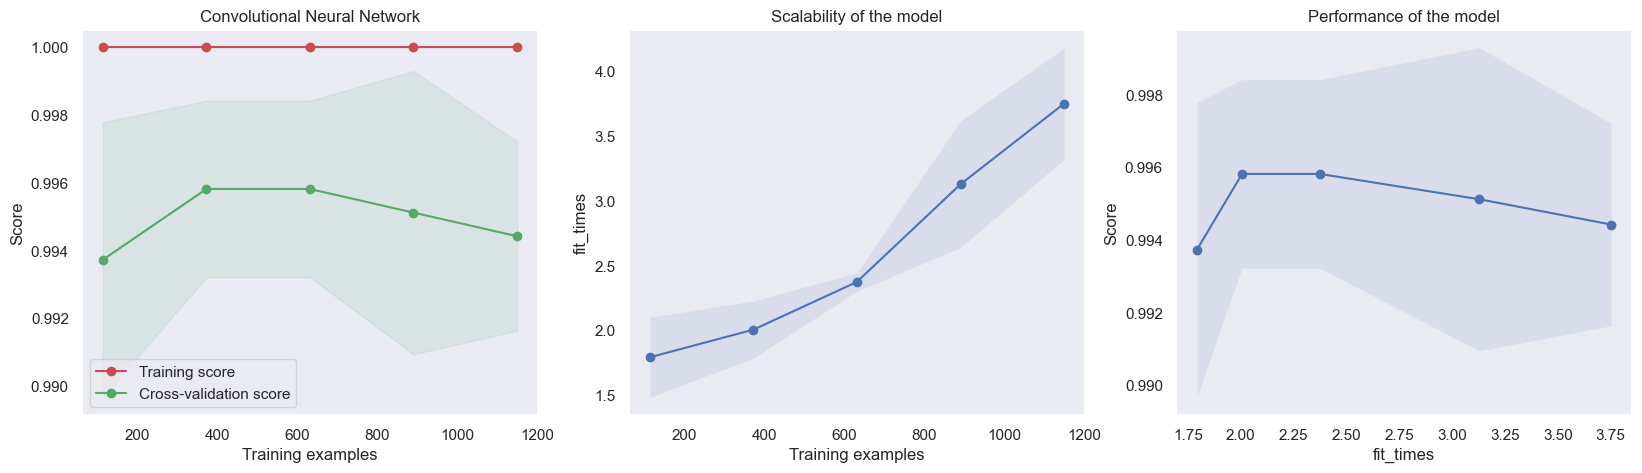

In [19]:
plot_learning_curve(estimator=cnn_wrap, title='Convolutional Neural Network', X=X_train_scaled, y=y_train, n_jobs=-1)

12/12 [==============================] - 0s 3ms/step


Text(0.5, 110.24999999999996, 'Predicted')

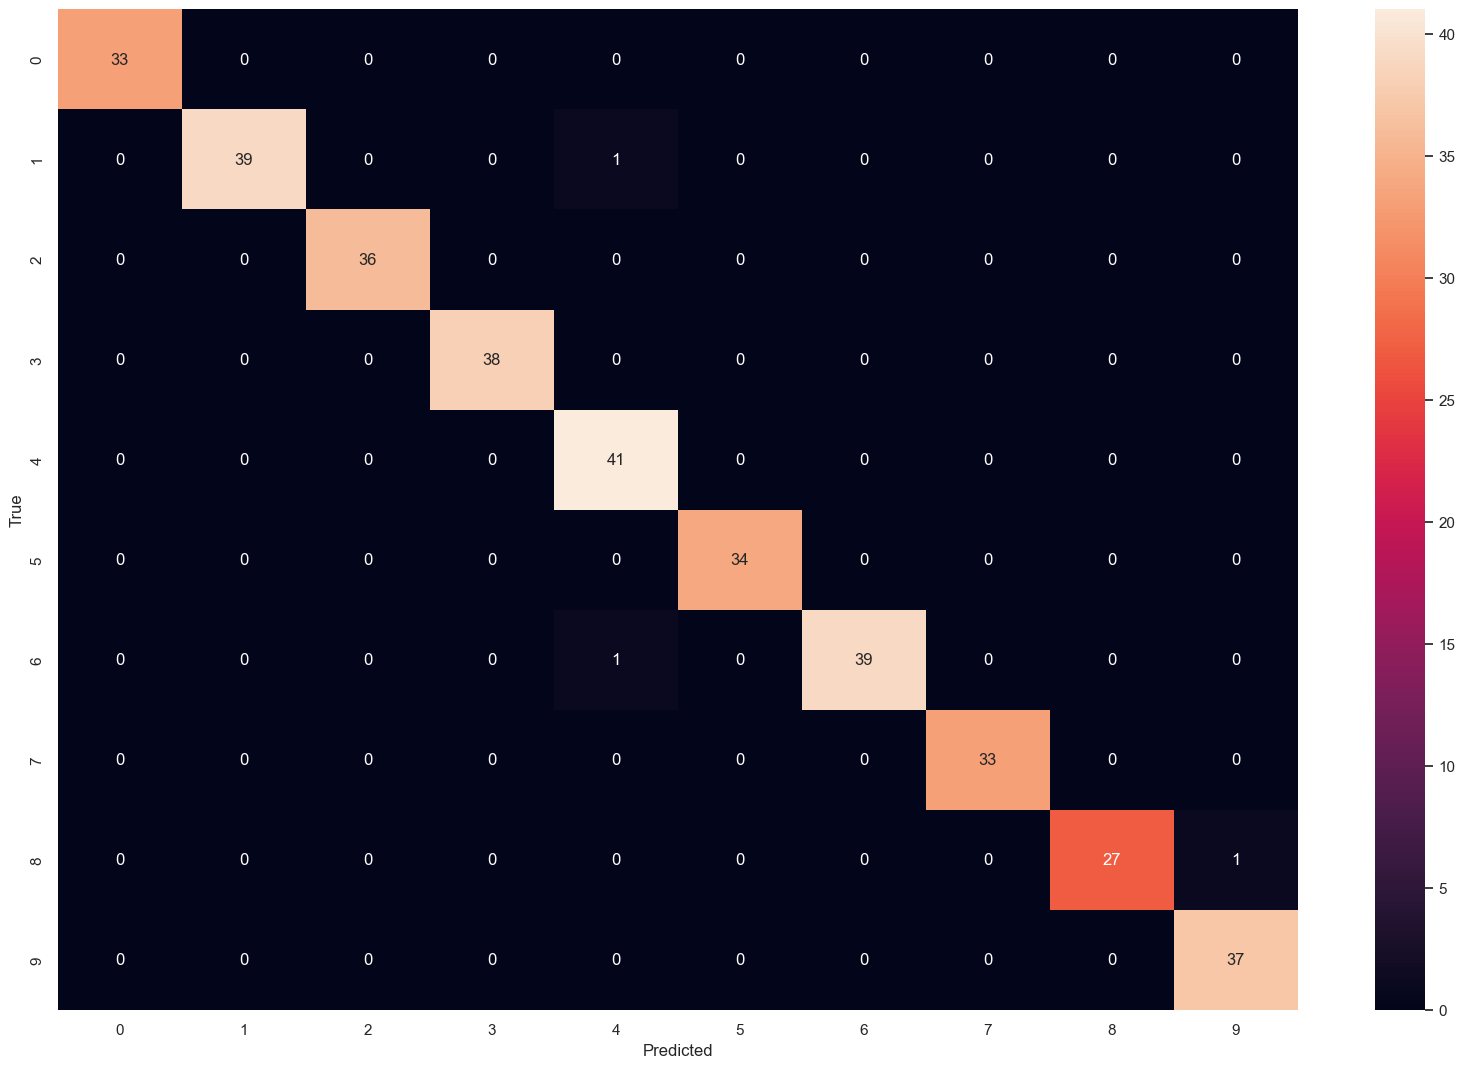

In [20]:
cnn_predictions = cnn_wrap.predict(X_test_scaled)
cnn_cm = confusion_matrix(y_test, cnn_predictions)
sns.heatmap(cnn_cm, annot=True)
plt.ylabel('True')
plt.xlabel('Predicted')

In [21]:
print(classification_report(y_test, cnn_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      0.97      0.99        40
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        38
           4       0.95      1.00      0.98        41
           5       1.00      1.00      1.00        34
           6       1.00      0.97      0.99        40
           7       1.00      1.00      1.00        33
           8       1.00      0.96      0.98        28
           9       0.97      1.00      0.99        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



On image recognition cnn crush every other model :)

### Exercise 2

Predict the churn rate with the xgboost classifier.

Here, you will be working with churn data. This dataset contains imaginary data from a ride-sharing app with user behaviors over their first month of app usage in a set of imaginary cities as well as whether they used the service 5 months after sign-up.

Download the dataset [here](https://raw.githubusercontent.com/goodboychan/goodboychan.github.io/main/_notebooks/dataset/churn_data.csv)

1. Write pipelines for preprocessing
2. Perform the right choices for hyperparameters.
3. Verify that your model does not overfits data. Measure the right metrics to justify your answers.

__NOTE__: you should get a final accuracy above the $75\%$.



In [22]:
url = 'https://raw.githubusercontent.com/goodboychan/goodboychan.github.io/main/_notebooks/dataset/churn_data.csv'
data = pd.read_csv(url)

In [23]:
data

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_inc_price,inc_pct,weekday_pct,fancy_car_user,city_Carthag,city_Harko,phone_iPhone,first_month_cat_more_1_trip,first_month_cat_no_trips,month_5_still_here
0,3.67,5.0,4.7,1.10,15.4,46.2,True,0,1,1,1,0,1
1,8.26,5.0,5.0,1.00,0.0,50.0,False,1,0,0,0,1,0
2,0.77,5.0,4.3,1.00,0.0,100.0,False,1,0,1,1,0,0
3,2.36,4.9,4.6,1.14,20.0,80.0,True,0,1,1,1,0,1
4,3.13,4.9,4.4,1.19,11.8,82.4,False,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5.63,4.2,5.0,1.00,0.0,100.0,False,0,1,1,0,1,1
49996,0.00,4.0,NaN,1.00,0.0,0.0,False,1,0,1,0,0,0
49997,3.86,5.0,5.0,1.00,0.0,100.0,True,0,0,0,0,1,0
49998,4.58,3.5,3.0,1.00,0.0,100.0,False,1,0,1,1,0,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   avg_dist                     50000 non-null  float64
 1   avg_rating_by_driver         49799 non-null  float64
 2   avg_rating_of_driver         41878 non-null  float64
 3   avg_inc_price                50000 non-null  float64
 4   inc_pct                      50000 non-null  float64
 5   weekday_pct                  50000 non-null  float64
 6   fancy_car_user               50000 non-null  bool   
 7   city_Carthag                 50000 non-null  int64  
 8   city_Harko                   50000 non-null  int64  
 9   phone_iPhone                 50000 non-null  int64  
 10  first_month_cat_more_1_trip  50000 non-null  int64  
 11  first_month_cat_no_trips     50000 non-null  int64  
 12  month_5_still_here           50000 non-null  int64  
dtypes: bool(1), floa

In [25]:
data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_inc_price,inc_pct,weekday_pct,city_Carthag,city_Harko,phone_iPhone,first_month_cat_more_1_trip,first_month_cat_no_trips,month_5_still_here
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,60.926084,0.330680,0.202600,0.691640,0.410040,0.307800,0.449880
std,5.707357,0.446652,0.617338,0.222336,19.958811,37.081503,0.470463,0.401941,0.461821,0.491846,0.461588,0.497487
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,33.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,66.700000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,100.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot: title={'center': 'avg_dist'}>,
        <AxesSubplot: title={'center': 'avg_rating_by_driver'}>,
        <AxesSubplot: title={'center': 'avg_rating_of_driver'}>],
       [<AxesSubplot: title={'center': 'avg_inc_price'}>,
        <AxesSubplot: title={'center': 'inc_pct'}>,
        <AxesSubplot: title={'center': 'weekday_pct'}>],
       [<AxesSubplot: title={'center': 'city_Carthag'}>,
        <AxesSubplot: title={'center': 'city_Harko'}>,
        <AxesSubplot: title={'center': 'phone_iPhone'}>],
       [<AxesSubplot: title={'center': 'first_month_cat_more_1_trip'}>,
        <AxesSubplot: title={'center': 'first_month_cat_no_trips'}>,
        <AxesSubplot: title={'center': 'month_5_still_here'}>]],
      dtype=object)

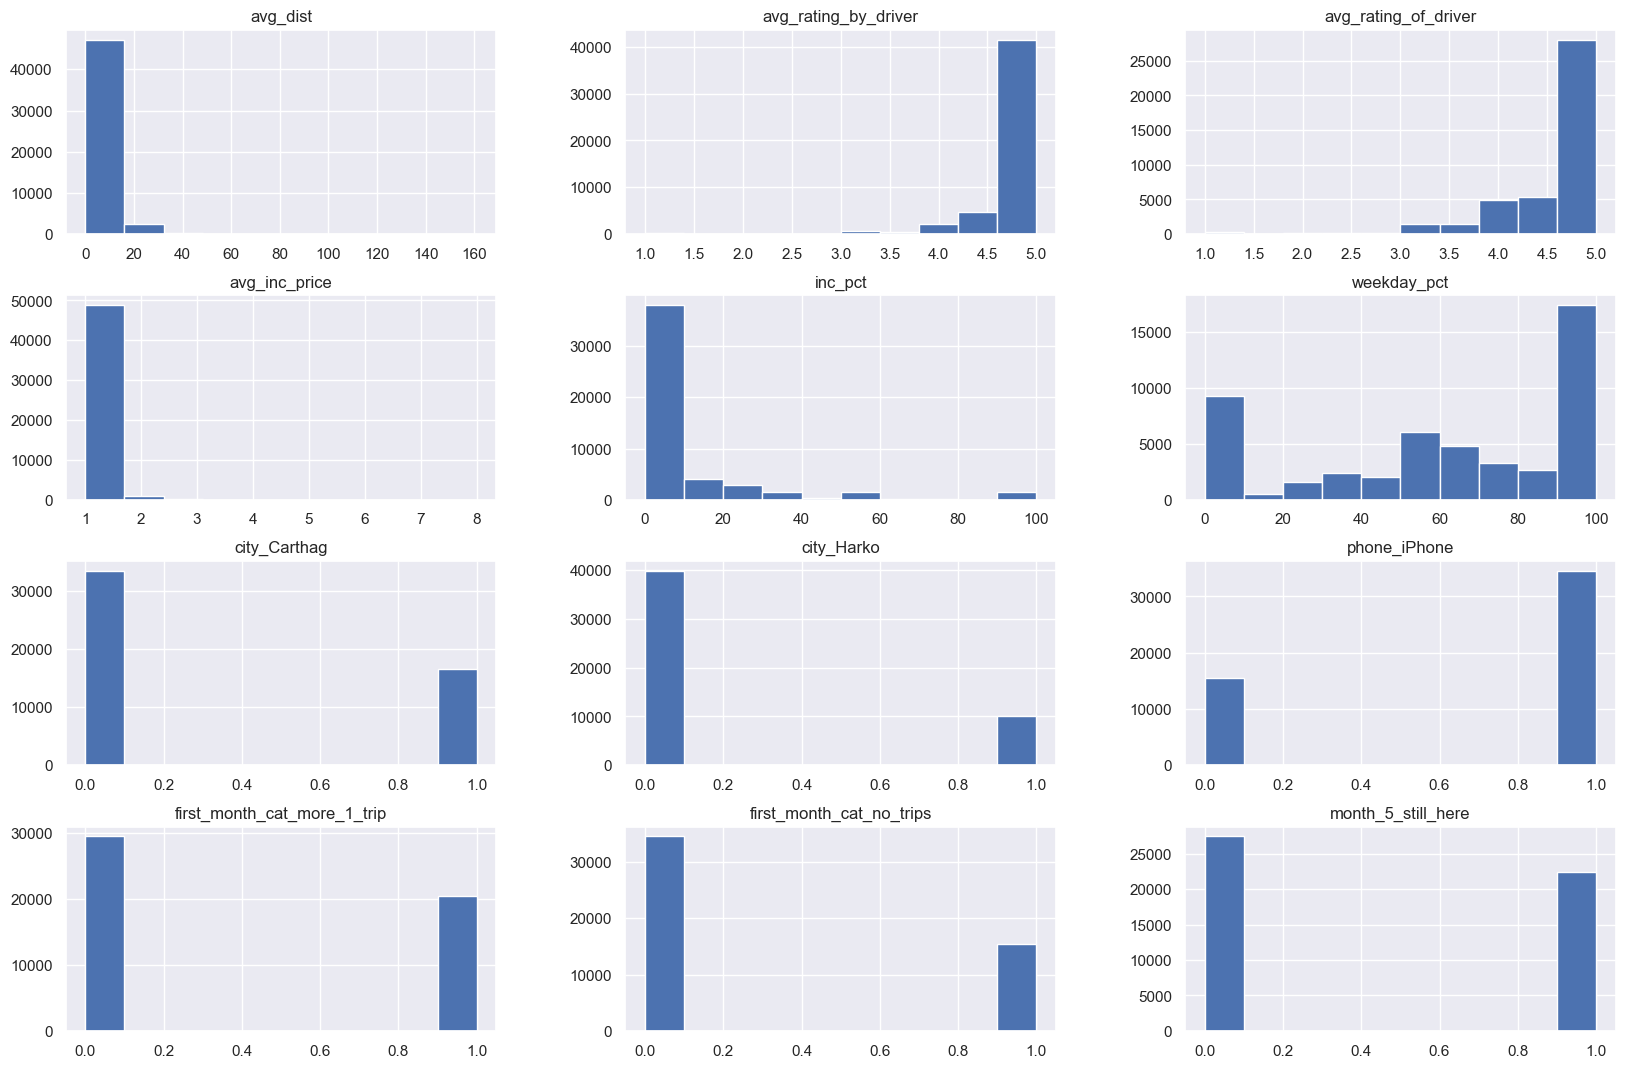

In [26]:
data.drop('fancy_car_user', axis = 1).hist()

The categorical variables are unbalanced

In [27]:
X = data.drop('month_5_still_here', axis = 1).values
y = data['month_5_still_here'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
transformer = ColumnTransformer(transformers = [('impute', SimpleImputer(strategy="mean"), [1,2]),
                                                ('scale', StandardScaler(), slice(0,6)),
                                                ('oh_encoder', OneHotEncoder(drop='if_binary'), [6])],
                                remainder='passthrough')     

X_train_proc = transformer.fit_transform(X_train)
X_test_proc = transformer.transform(X_test)

Let's see a baseline model

In [36]:
xgb = XGBClassifier()
xgb.fit(X_train_proc, y_train)

print(f'Training score = {xgb.score(X_train_proc, y_train)} | Test_score = {xgb.score(X_test_proc, y_test)}')

Training score = 0.815825 | Test_score = 0.7616


<module 'matplotlib.pyplot' from 'C:\\Users\\ggiam\\anaconda3\\envs\\py10\\lib\\site-packages\\matplotlib\\pyplot.py'>

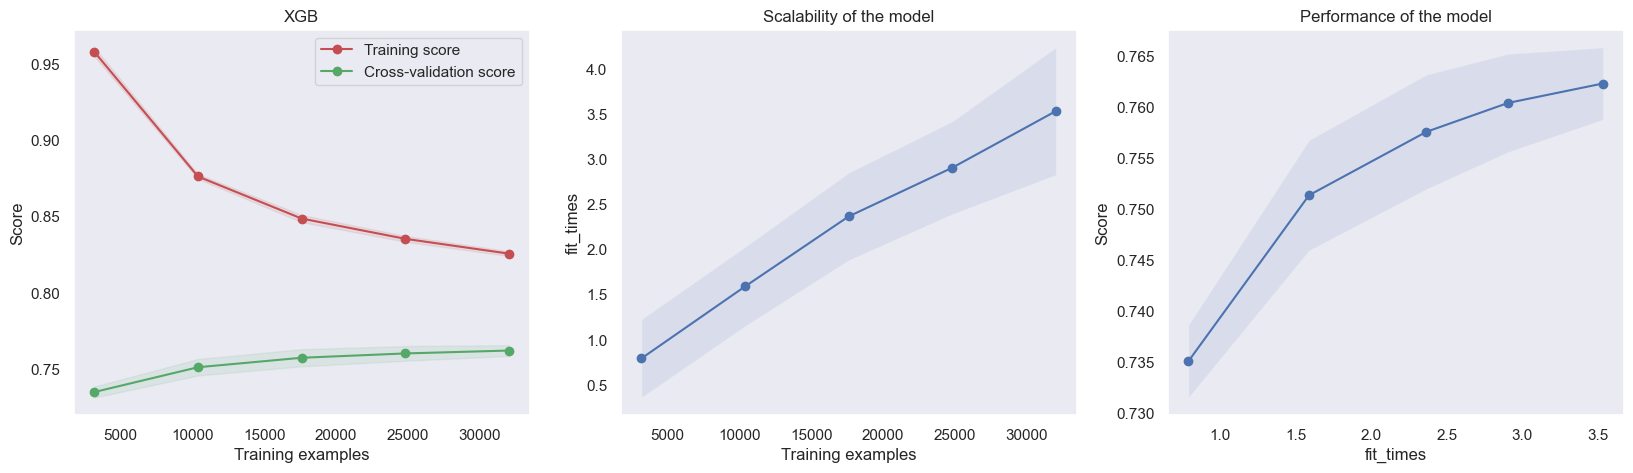

In [37]:
plot_learning_curve(estimator=xgb, title='XGB', X=X_train_proc, y=y_train, n_jobs=-1)

The model is slightly overfitting, let's see if we can reduce that with a gridsearch

In [44]:
params = {"max_depth": [3, 4, 5, 7],
          "learning_rate": [0.5, 0.1, 0.01, 0.05]
         }

grid = GridSearchCV(XGBClassifier(), param_grid=params, n_jobs=-1)
grid.fit(X_train_proc, y_train)
best = grid.best_estimator_

print(f'Best parameters:{grid.best_params_}')
print(f'Training score = {grid.score(X_train_proc, y_train)} | Test_score = {grid.score(X_test_proc, y_test)}')

Best parameters:{'learning_rate': 0.1, 'max_depth': 5}
Training score = 0.7791 | Test_score = 0.7709


<module 'matplotlib.pyplot' from 'C:\\Users\\ggiam\\anaconda3\\envs\\py10\\lib\\site-packages\\matplotlib\\pyplot.py'>

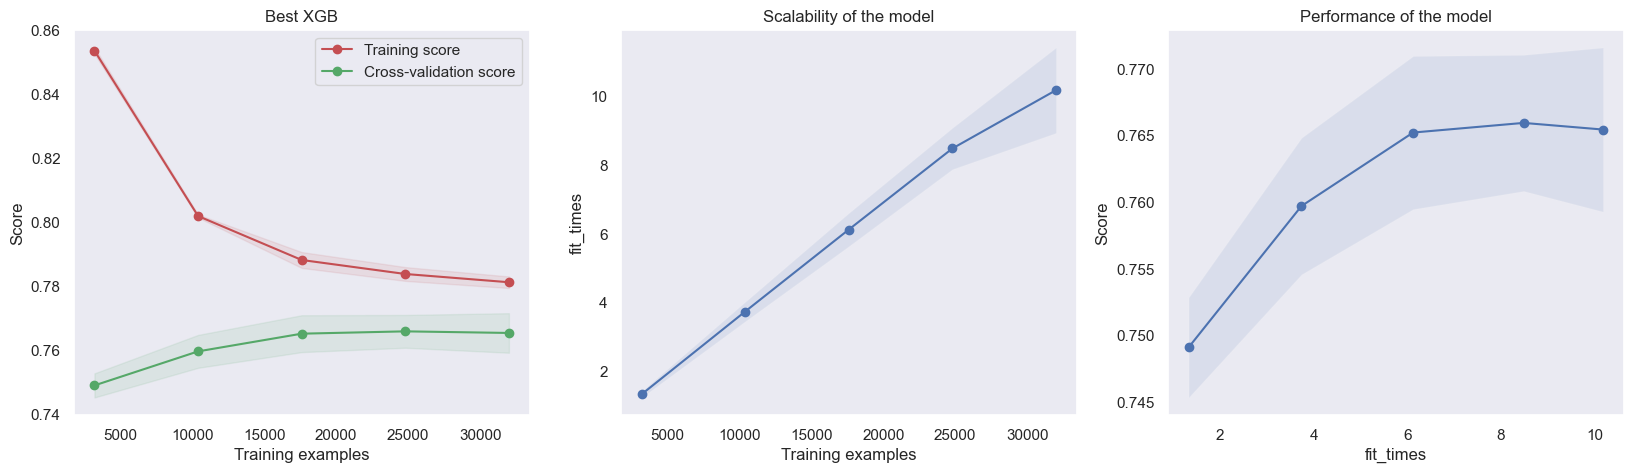

In [45]:
plot_learning_curve(estimator=best, title='Best XGB', X=X_train_proc, y=y_train, n_jobs=-1)

For sure we reduced overfitting
<br>
Let's see the calssificatione metric

Text(0.5, 110.24999999999996, 'Predicted')

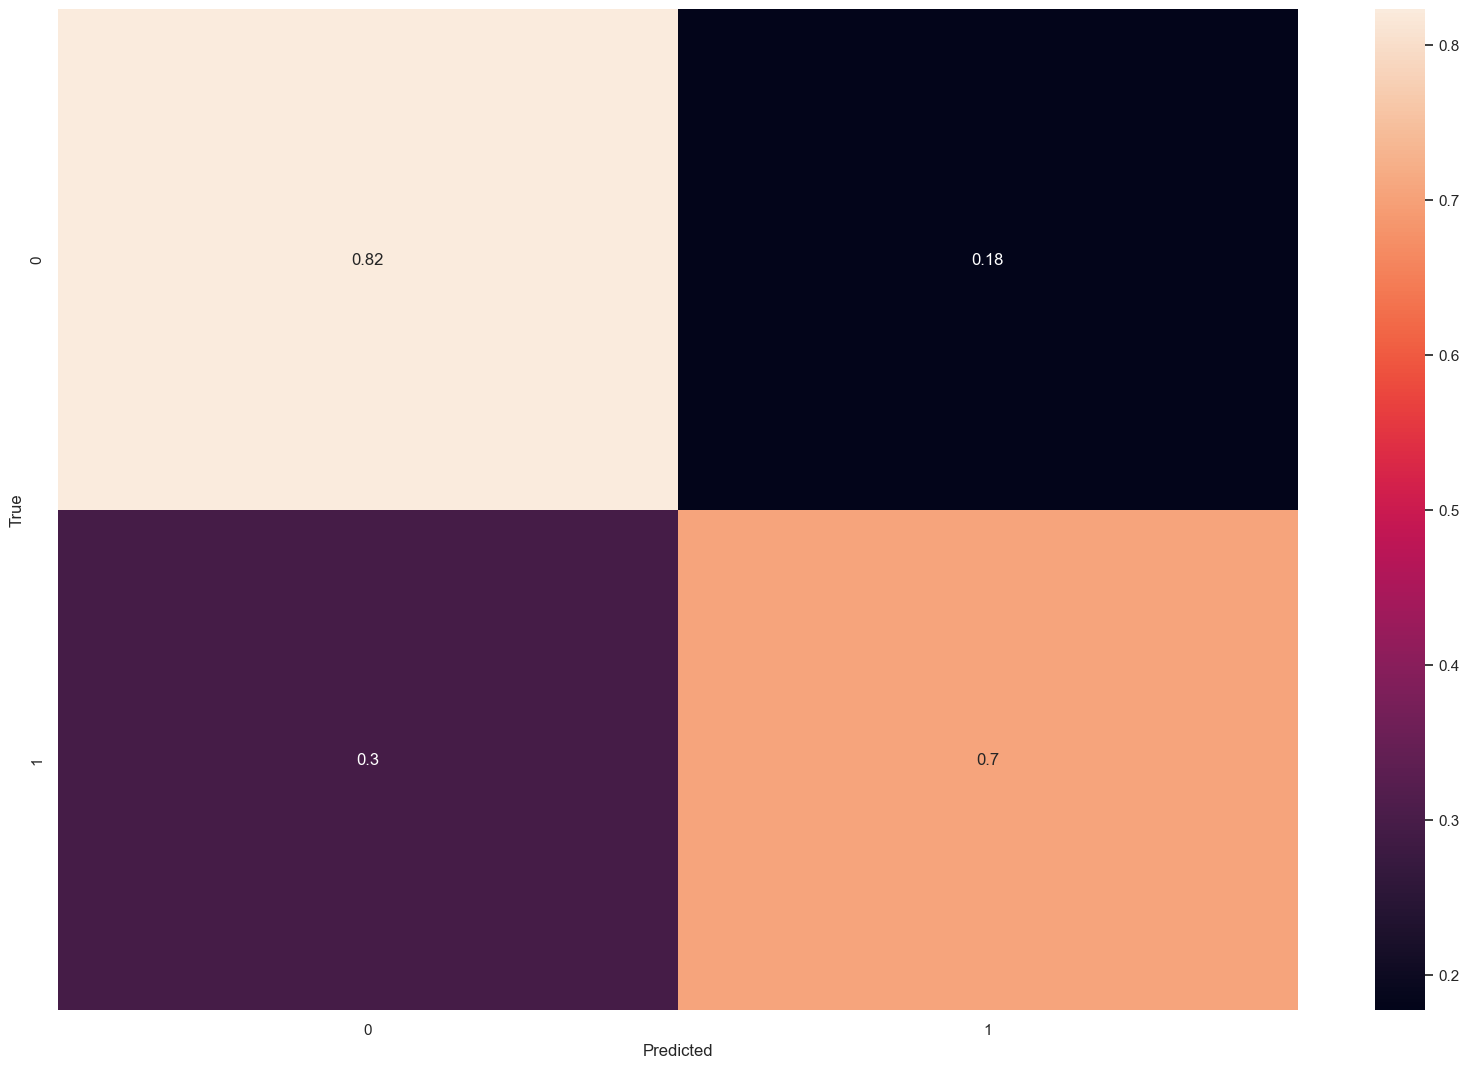

In [46]:
xgb_predictions = best.predict(X_test_proc)
xgb_cm = confusion_matrix(y_test, xgb_predictions, normalize='true')
sns.heatmap(xgb_cm, annot=True)
plt.ylabel('True')
plt.xlabel('Predicted')

In [47]:
print(classification_report(y_test, xgb_predictions))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      5588
           1       0.76      0.70      0.73      4412

    accuracy                           0.77     10000
   macro avg       0.77      0.76      0.77     10000
weighted avg       0.77      0.77      0.77     10000



The classifier performs sligltly worse on class 1, maybe because there are less data, available
<br>
Now we'll check the features importance

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

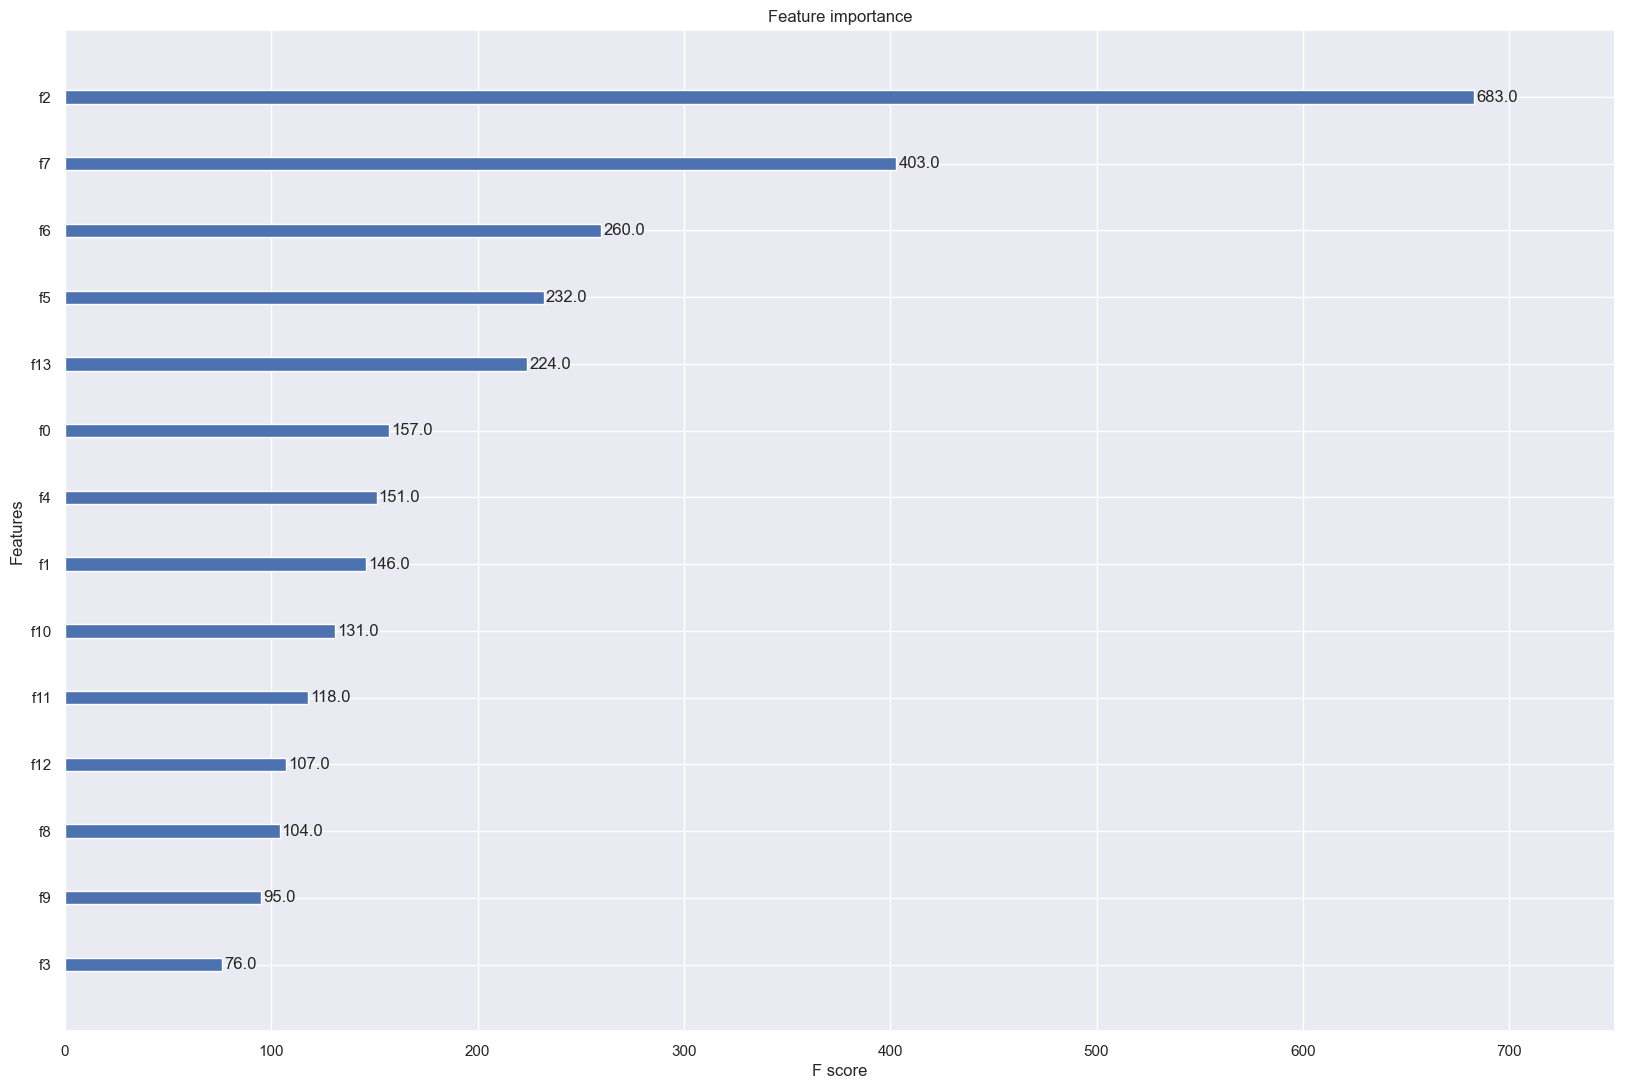

In [48]:
plot_importance(best)

According to the above graph the most important features are avg_rating_of_driver, city_Carthag and weekday_pct.
<br>
So people whom had a good experience with drivers tends to use the apps for 5 month at least
<br>
The full pipeline is

In [43]:
full_pipe = Pipeline(steps=[('preprocessing', transformer),
                            ('model', XGBClassifier(**grid.best_params_))])                            